# Introduction to Convolutional Neural Networks (CNN) and Autoencoders

![CNN](1_Ij3uWzuUqax2u7p-73_w2A.jpeg)

## Pre-requisites
ML concepts, training a model, etc.

## Logistic Regression

- Logistic regression is a classification algorithm which always outputs a probability. 
- Binary and multi-class classification problems. 
- It is given by, 
                z = W.T*X + b
                y = sigmoid(z)

![sigmoid](An-illustration-of-the-signal-processing-in-a-sigmoid-function.png)

## A Neuron

![Neuron](images.png)

## Fully-connected neural network

![FC](FC.jpeg)

- Each and every neuron in a layer is connected to each and every neuron in the next layer.
- Accepts only vectorised inputs. For 2D-images, we have to flatten them before feeding to the network.
- Because of more number of connections we have more number of parameters to train. 

### Example

Let's say we have a dataset of gray images of size (224,224). After vectorizing, the size will be:


In [1]:
print(f"The input to the fully-connected neural network will be a vector of size: {224*224}")

The input to the fully-connected neural network will be a vector of size: 50176


In [2]:
print(f'Even if we use 1000 neurons in the second layer, the size of the weight matrix will be: {1000,224*224}')

Even if we use 1000 neurons in the second layer, the size of the weight matrix will be: (1000, 50176)


In [3]:
print(f"The total no. of parameters for FC-Network is {1000*224*224}")

The total no. of parameters for FC-Network is 50176000


### Difficulties with Fully-connected networks
- Huge data is required in order to learn so many parameters.
- Memory and computation requirements

## Convolution Operation

In [51]:
#!pip install opencv-python

In [70]:
#!pip install matplotlib

In [4]:
import cv2
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
image = cv2.imread('buildings.jpeg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

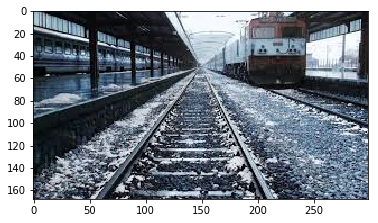

In [6]:
plt.imshow(image)

In [8]:
filter_x = np.array([[ 1, 0, -1],                 # The array elements are called kernel co-efficients
                   [ 1, 0, -1], 
                   [ 1, 0, -1]])

In [9]:
filtered_image_x = cv2.filter2D(image_gray, -1, filter_x)

In [10]:
def Res_plot(image, res_image):
    plt.figure(figsize=(12,8))
    plt.subplot(1,2,1)
    plt.imshow(image)
    plt.subplot(1,2,2)
    plt.imshow(res_image, cmap = 'gray')

In [11]:
image.shape

(168, 299, 3)

In [12]:
filtered_image_x.shape

(168, 299)

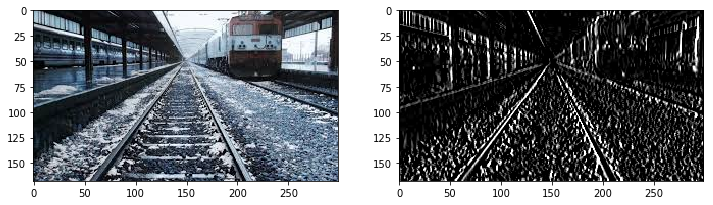

In [13]:
Res_plot(image, filtered_image_x)

### What just happened? Is this the convolution operation? 
Lets see a simple example. 

![Convolution](conv.png)

![conv_out](cnn_out.png)

- The kernel elements are called the kernel co-efficients
- Size of the input (n * n) : (6 * 6)
- Kernel size : (3 * 3)
- Output size : ((n-3)+1) * ((n-3)+1) = 4 * 4

![cnn_gif](cnn.gif)

![cnn_edge](cnn_edge.png)

### More filters

- Here, we saw only one type of vertical edge detector kernel/filter. 
- There are different types of such filters available each with their own pattern. For example,

![kernels](Kernels.png)

- All of the above filters perform one feature extraction (vertical edge detection) only.
- There can be 'n' number of features that can be extracted from images and we may not know all of them.

- The kernel co-efficients were manually picked by us. 
### We can make the neural network learn these kernel co-efficients as weights during back-propagation. That is the whole idea behind Convolutional neural networks. 

- These learned kernel co-efficients can perform different feature extraction that may known to us.

### Concepts in CNN
1. Padding - Padding zeros along the border of the image to preserve the spatial dimension.
2. Stride - Determines how much the kernel should slide across the image. 
3. Pooling layers - Helps to reduce the spatial dimension of the image.

![padding_stride](padding_strides.gif)

- Input image size (n * n) : 5 * 5
- Kernel size (f * f) : 3 * 3
- Padding (p) : 1
- Stride (s): 2
- Output size: 3 * 3
### Output size:  ((n+2p-f)/s + 1)  *  ((n+2p-f)/s + 1)

### Convolution over volumes with kernel cubes

- If the input has 3 channels, each kernel will also have 3 channels. 
- We perform element-wise multiplication across these channels.
- We add all the values (27 values for 3 * 3 kernels). 
- The result of this will be an output with one channel only.

## A single CNN layer

![cnn_layer](cnn_layer.png)

### The results of the convolution opertion are fed to activation functions. 
- The input depth is d1.
- Each kernel's depth is d1.
- No. of kernels used is d2. 
- The output depth is d2. 

In [14]:
# Lets say we have applied 96 filters
Weights = 3*3*3*96
Bias = 96
Total_parameters = Weights+Bias
print(Total_parameters)

2688


In [81]:
print(f"The total no. of parameters for CNN is {Total_parameters}")
print(f"The total no. of parameters for FC-Network is {1000*224*224}")

The total no. of parameters for CNN is 2688
The total no. of parameters for FC-Network is 50176000


### Adantages of CNN over fully-connected network
1. Spatial information is preserved. 
2. Parameter sharing: Less number of parameters because same kernel co-efficients are used for the entire image.
3. Sparsity of connections: Each output neuron is connected only to small number of inputs. 

### Convolutional Neural Network

![alex](alexnet.png)

### Residual Neural network

![resnet](resnet.png)

- The problem with deeper networks is that it causes over-fitting. ResNets overcomes this problem by making use of skip connections. 
- ResNets tries to solve the problem of vanishing and exploding gradients by allowing the activations to go deeper into the network.

![resnet](resnet_34.png)

### CNN training
1. Forward propagation. 
2. Calculate the loss. 
3. Calculate gradients with back propagation.
4. Update parameters using optimizers.

## Autoencoders

Autoencoder is an unsupervised (semi-supervised) artificial neural network that learns how to efficiently compress and encode data then learns how to reconstruct the data back from the reduced encoded representation to a representation that is as close to the original input as possible.

![auto](DAE.png)

1. Encoder - The encoder uses raw-data as input and produces feature representation as output. 
2. Decoder - Uses the extracted feature from the encoder as input and reconstructs the original data. 

## Colorizing gray images using Autoencoders

### Absolute color space
1. A single grayscale image may correspond to many possible coloured images. 
2. We cannot directly convert Gray images to coloured images, unless we are making use of an intermediate absolute color space such as LAB or HSV colorspace.

### Steps in training
1. Input: RGB images. Convert them to Lab colorspace. 
2. Pass the L-lightness channel as input to the model.
3. Compute the loss (MSE loss) by comparing and the output 2-channels with the "ab" channels from Lab color space.
4. Perform backpropagation and update the parameters. 
5. Iterate until the loss is minimum. 